In [7]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [8]:
m = 10000
n = 1000
w1 = np.array([[-0.5]])  # shape(n, 1)
w2 = np.array([[0.5]])  # shape(n, 1)
b1 = np.array([[1.]])
b2 = np.array([[0.5]])
k = 20000
alpha = 0.001
cost_arr = list()

In [9]:
def generate_dataset(size):
    x_train = list()
    y_train = list()
    for i in range(size):
        degree_value = random.uniform(0, 360)
        cosine_value = math.cos(math.radians(degree_value))
        x_train.append(degree_value)
        if cosine_value > 0:
            y_train.append(1)
        else:
            y_train.append(0)
    x_train = np.array(x_train).reshape(1, len(x_train))
    y_train = np.array(y_train).reshape(1, len(y_train))
    return x_train, y_train

In [10]:
def logistic_regression(X, Y):
    global w1, w2, b1, b2, cost_arr
    Z1 = np.dot(w1.T, X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    A1 = np.clip(A1, 1e-12, 1 - 1e-12)
    Z2 = np.dot(w2.T, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    A2 = np.clip(A2, 1e-12, 1 - 1e-12)

    cost_arr.append(-np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2)))

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(w2.T, dZ2) * (A1 * (1 - A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    w2 = w2 - alpha * dW2
    b2 = b2 - alpha * db2
    w1 = w1 - alpha * dW1
    b1 = b1 - alpha * db1

In [11]:
def testing_accuracy_and_cost(size, X, Y):
    accuracy = 0
    y_classified = list()
    Z1 = np.dot(w1.T, X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    A1 = np.clip(A1, 1e-12, 1 - 1e-12)
    Z2 = np.dot(w2.T, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    A2 = np.clip(A2, 1e-12, 1 - 1e-12)
    for i in range(size):
        if A2[0, i] > 0.5:
            y_classified.append(np.array([[1]]))
            if Y[0, i] == 1: accuracy += 1
        elif A2[0, i] < 0.5:
            y_classified.append(0)
            if Y[0, i] == 0: accuracy += 1
    accuracy = accuracy / size * 100
    cost = -np.mean(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    return accuracy, cost, y_classified

[[-0.49422255]] [[7.39110793]] [[0.50492088]] [[1.70050333]]
[[-0.47823387]] [[14.4767711]] [[0.51900082]] [[1.67129871]]
[[-0.4495967]] [[21.78775031]] [[0.54331194]] [[1.63530399]]
[[-0.39746784]] [[30.25429151]] [[0.58101696]] [[1.57556752]]
[[-0.37316587]] [[33.56655548]] [[0.63312146]] [[1.52817455]]
[[-0.37563244]] [[33.78303385]] [[0.68552011]] [[1.50770728]]
[[-0.37824627]] [[34.01221968]] [[0.73728329]] [[1.4867969]]
[[-0.3809946]] [[34.25343511]] [[0.78840729]] [[1.46544459]]
[[-0.3838672]] [[34.50575089]] [[0.83888775]] [[1.44365468]]
[[-0.38685408]] [[34.76825811]] [[0.88871978]] [[1.42143186]]
[[-0.38994552]] [[35.04007213]] [[0.93789803]] [[1.39878122]]
[[-0.39313208]] [[35.32033573]] [[0.98641668]] [[1.37570832]]
[[-0.39640467]] [[35.60822167]] [[1.03426961]] [[1.35221928]]
[[-0.39975453]] [[35.90293453]] [[1.08145038]] [[1.32832077]]
[[-0.40317328]] [[36.2037121]] [[1.12795236]] [[1.30402013]]
[[-0.40665291]] [[36.5098262]] [[1.17376877]] [[1.27932534]]
[[-0.41018578]] 

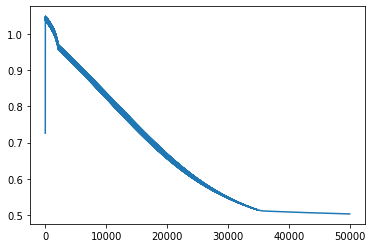

/var/folders/84/60qlylj12070w_hl5lhc6r700000gn/T/ipykernel_19031/2303415025.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array(y_classified).reshape(1, len(y_classified))


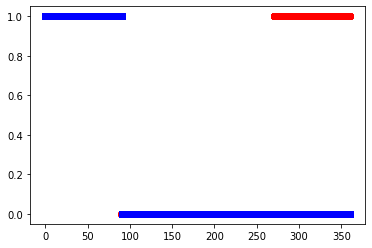

75.11 0.5030204906551088


/var/folders/84/60qlylj12070w_hl5lhc6r700000gn/T/ipykernel_19031/2303415025.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result2 = np.array(y_classified).reshape(1, len(y_classified))


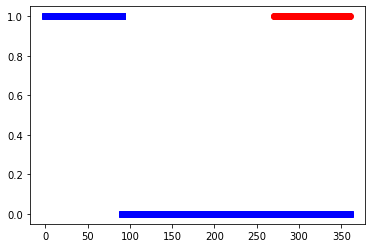

75.0 0.5029537998521227


In [12]:
if __name__ == '__main__':
    x_train, y_train = generate_dataset(m)
    x_test, y_test = generate_dataset(n)
    for i in range(1, k+1):
        logistic_regression(x_train, y_train)
        if i % 500 == 0: print(w1, b1, w2, b2)

    plt.plot(cost_arr)
    plt.show()

    accuracy, cost, y_classified = testing_accuracy_and_cost(m, x_train, y_train)
    result = np.array(y_classified).reshape(1, len(y_classified))
    plt.plot(x_train, y_train, 'ro')
    plt.plot(x_train, result, 'bs')
    plt.show()
    print(accuracy, cost)

    accuracy2, cost2, y_classified = testing_accuracy_and_cost(n, x_test, y_test)
    result2 = np.array(y_classified).reshape(1, len(y_classified))
    plt.plot(x_test, y_test, 'ro')
    plt.plot(x_test, result2, 'bs')
    plt.show()
    print(accuracy2, cost2)